In [6]:
import pandas as pd
from dbconnection import create_database_connection, read_data_into_dataframe
from plottingFunction import plot_histogram, scatter_plot_UL_vs_DL, scatter_plot_total_data



In [7]:
engine = create_database_connection()
df=read_data_into_dataframe(engine, "xdr_data")
#rawdf.head(5)
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

Display information about the DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

Missing values

In [9]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Data frame Summary statistics

In [10]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Display the result
print("Percentage of missing values for each column:")
print(missing_percentage)


Percentage of missing values for each column:
Bearer Id                                    0.66
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.38
MSISDN/Number                                0.71
IMEI                                         0.38
Last Location Name                           0.77
Avg RTT DL (ms)                             18.55
Avg RTT UL (ms)                             18.54
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 58.76
TCP UL Retrans. Vol (Bytes)                 64.43
DL TP < 50 Kbps (%)                          0.50
50 Kbps < DL TP < 250 Kbps (%)               0.50
250 Kbps < DL TP < 1 Mbps (%)                0.50
DL T

Display the top 10 handsets

In [12]:
top_10_handsets = df['Handset Type'].value_counts().head(10).reset_index()
top_10_handsets.columns = ['handset_model', 'total_count']
print("top 10 handsets")
print(top_10_handsets)

top 10 handsets
                  handset_model  total_count
0              Huawei B528S-23A        19752
1       Apple iPhone 6S (A1688)         9419
2        Apple iPhone 6 (A1586)         9023
3                     undefined         8987
4        Apple iPhone 7 (A1778)         6326
5       Apple iPhone Se (A1723)         5187
6        Apple iPhone 8 (A1905)         4993
7       Apple iPhone Xr (A2105)         4568
8  Samsung Galaxy S8 (Sm-G950F)         4520
9        Apple iPhone X (A1901)         3813


Top 3 handset manufacturers

In [13]:
top_3_Manufacturers = df['Handset Manufacturer'].value_counts().head(3)
top_3_Manufacturers.columns = ['Handset Manufacturer', 'total_count']
print("Top 3 Manufacturer")
print(top_3_Manufacturers)


Top 3 Manufacturer
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


Identify the top 5 handsets per top 3 handset manufacturer

In [14]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index
filtered_data = df[df['Handset Manufacturer'].isin(top_3_manufacturers)]

# Find the top 5 handset types for each manufacturer
top_handsets_per_manufacturer = filtered_data.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0, group_keys=False).nlargest(5)

# Display the result
print(top_handsets_per_manufacturer)



Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

Aggregate per user

In [15]:
from dataProcessing import convert_to_datetime, calculate_session_duration, aggregate_per_user

all_applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Apply data processing functions
df = convert_to_datetime(df)
df = calculate_session_duration(df)
user_aggregated = aggregate_per_user(df, all_applications)

# Display the aggregated information
user_aggregated.head(10)


,Number of xDR sessions,Session Duration (s),Total Download (Bytes),Total Upload (Bytes),Social Media (Total Bytes),Google (Total Bytes),Email (Total Bytes),Youtube (Total Bytes),Netflix (Total Bytes),Gaming (Total Bytes),Other (Total Bytes)
MSISDN/Number,,,,,,,,,,,
3.360100e+10,1,116760.0,8.426375e+08,36053108.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,3.865709e+08
3.360100e+10,1,181260.0,1.207552e+08,36104459.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,2.817101e+08
3.360100e+10,1,135000.0,5.566597e+08,39306820.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,5.016937e+08
3.360101e+10,1,49920.0,4.019932e+08,20327526.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,3.527970e+07
3.360101e+10,2,37200.0,1.363130e+09,94280527.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,8.048045e+08
3.360101e+10,2,253980.0,5.552080e+08,60009249.0,3792912.0,15263134.0,7848596.0,34347122.0,30315501.0,5.116358e+08,4.923728e+08
3.360101e+10,2,128400.0,5.530412e+08,101681858.0,2769627.0,10196403.0,1358959.0,26431335.0,45812397.0,5.484611e+08,2.248887e+08
3.360101e+10,1,86400.0,2.940851e+08,38575279.0,1782692.0,12023614.0,2215563.0,18892740.0,15292840.0,2.823644e+08,1.782015e+08
3.360101e+10,2,495660.0,8.965602e+08,93572016.0,5288685.0,14134211.0,4599825.0,63443802.0,54216117.0,8.330880e+08,1.041883e+09


data cleaning

In [16]:
df_not_num = df.select_dtypes(exclude=['number']).columns
df_numeric = df.drop(df_not_num, axis=1)

cleaned_data = df_numeric.fillna(df_numeric.mean())

In [17]:
cleaned_data.isnull().sum()

Bearer Id                                   0
Start ms                                    0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                   

EDA

In [18]:
# Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
columns_numeric = [
    "Dur. (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)"
]

# Create a new DataFrame with selected columns
data_new = cleaned_data[columns_numeric]

# Display the new DataFrame
data_new.describe()


,Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Other DL (Bytes),Other UL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046086e+05,13300.045927,1770.428647,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.112121e+07,4.546434e+08,4.211005e+08,8.264799e+06
std,8.103735e+04,23971.798635,4625.340082,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,1.127635e+07,2.441421e+08,2.432050e+08,4.769004e+06
min,7.142000e+03,0.000000,0.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,2.866892e+06,7.114041e+06,3.290000e+03,1.480000e+02
25%,5.744200e+04,43.000000,47.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,3.322203e+07,2.431072e+08,2.101869e+08,4.145943e+06
50%,8.639900e+04,63.000000,63.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.114324e+07,4.558409e+08,4.218030e+08,8.267071e+06
75%,1.324300e+05,19710.000000,1120.000000,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,4.903424e+07,6.657051e+08,6.316918e+08,1.238415e+07
max,1.859336e+06,378160.000000,58613.000000,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,7.833131e+07,9.029696e+08,8.434425e+08,1.655882e+07


Non-Graphical Univariate Analysis by computing dispersion parameters 

In [19]:

import pandas as pd

# Select quantitative columns
quantitative_columns = data_new.select_dtypes(include=['number']).columns

# Calculate statistics using agg method
dispersion_data = data_new[quantitative_columns].agg(['min', 'max', 'var', 'std',lambda x: (x.std() / x.mean()) * 100
, lambda x: x.quantile(0.75) - x.quantile(0.25), lambda x: x.max() - x.min()]).T

# Rename the columns
dispersion_data.columns = ['Min', 'Max', 'Variance','Standard Deviation','CV', 'IQR', 'Range']
dispersion_data



,Min,Max,Variance,Standard Deviation,CV,IQR,Range
Dur. (ms),7142.0,1859336.0,6.567052e+09,8.103735e+04,77.467227,74988.0,1852194.0
Avg Bearer TP DL (kbps),0.0,378160.0,5.746471e+08,2.397180e+04,180.238465,19667.0,378160.0
Avg Bearer TP UL (kbps),0.0,58613.0,2.139377e+07,4.625340e+03,261.255380,1073.0,58613.0
Social Media DL (Bytes),12.0,3586064.0,1.072224e+12,1.035482e+06,57.676696,1795790.0,3586052.0
Social Media UL (Bytes),0.0,65870.0,3.612348e+08,1.900618e+04,57.719654,32886.0,65870.0
Google DL (Bytes),207.0,11462832.0,1.095012e+13,3.309097e+06,57.541982,5741159.0,11462625.0
Google UL (Bytes),3.0,4121357.0,1.415902e+12,1.189917e+06,57.860086,2064175.0,4121354.0
Email DL (Bytes),14.0,3586146.0,1.072963e+12,1.035840e+06,57.812291,1796534.0,3586132.0
Email UL (Bytes),2.0,936418.0,7.288343e+10,2.699693e+05,57.763083,467057.0,936416.0
Youtube DL (Bytes),53.0,23259098.0,4.503173e+13,6.710569e+06,57.680308,11615017.0,23259045.0


Graphical Univariate Analysis

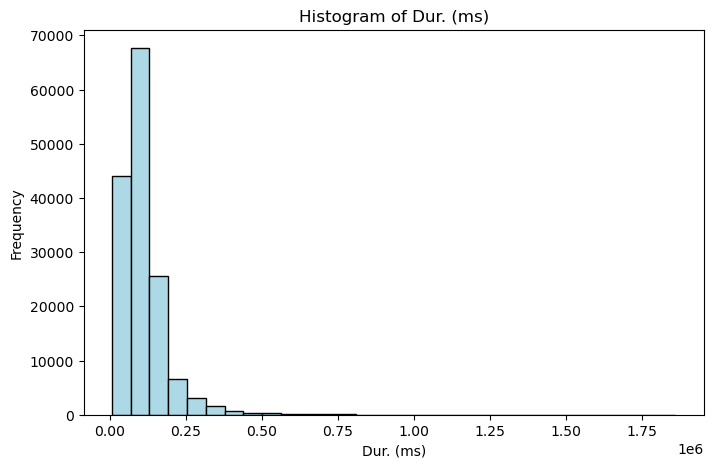

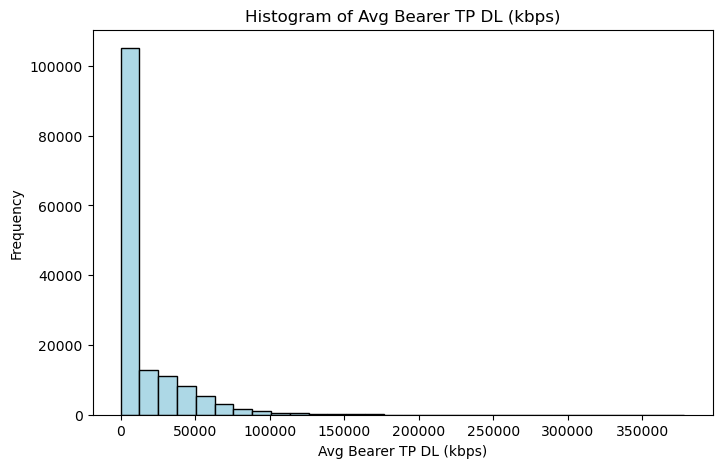

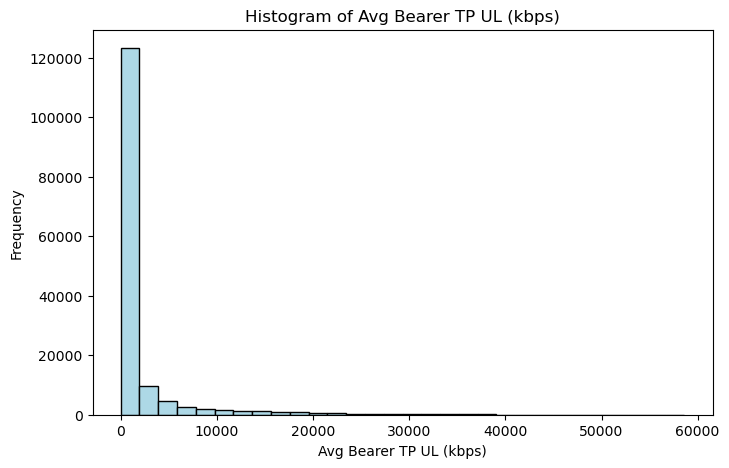

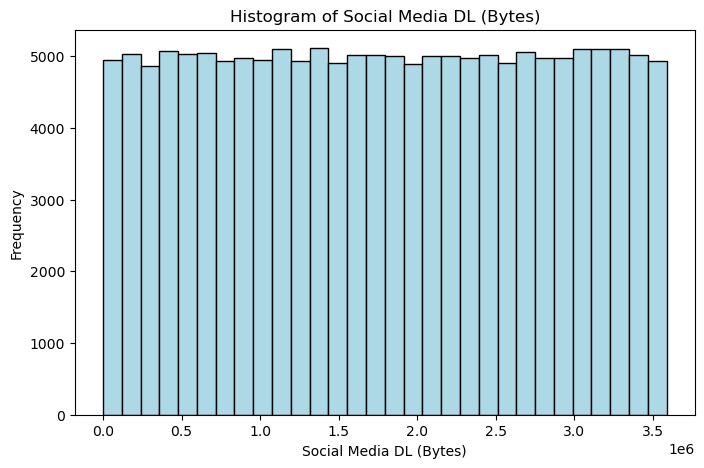

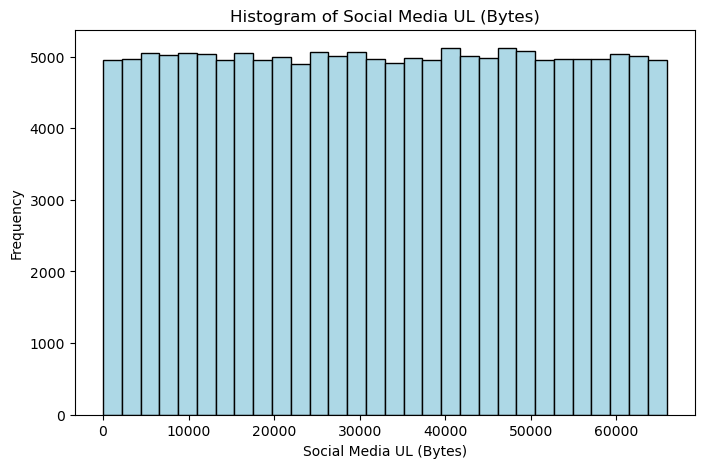

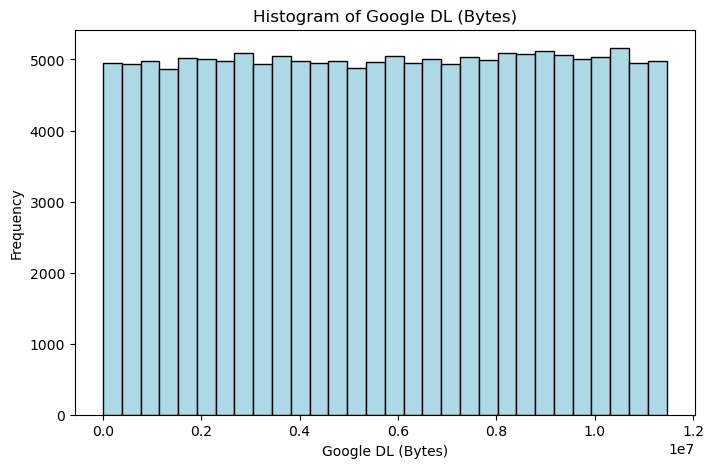

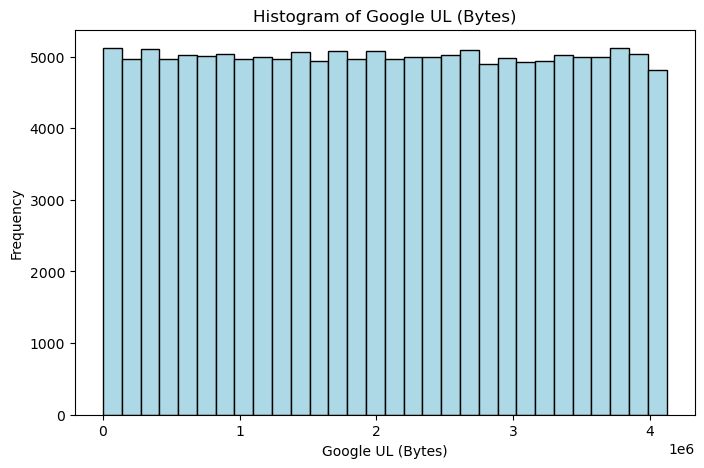

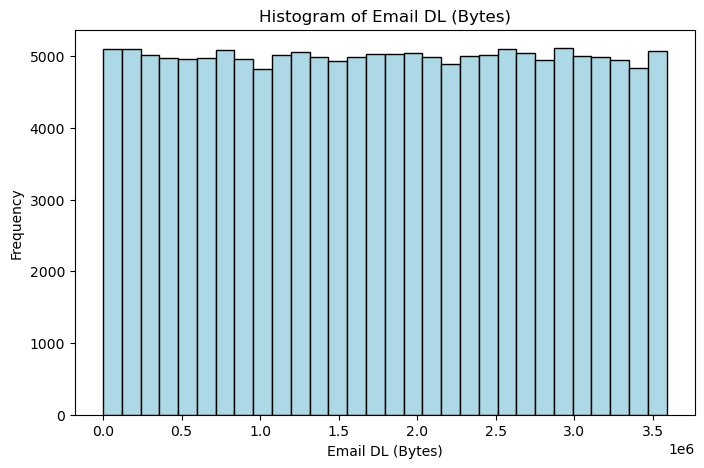

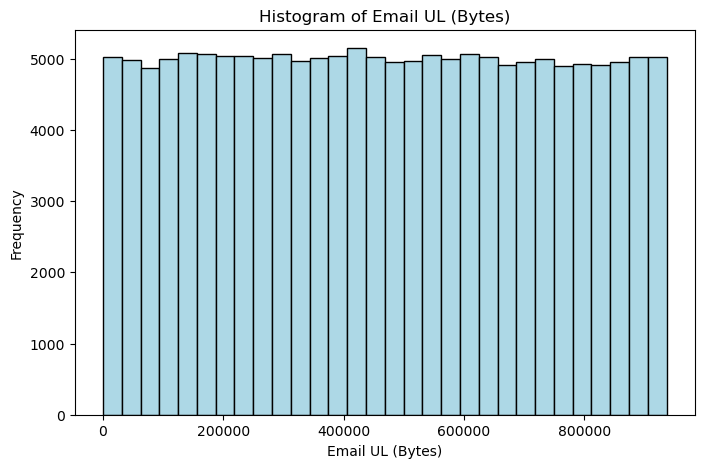

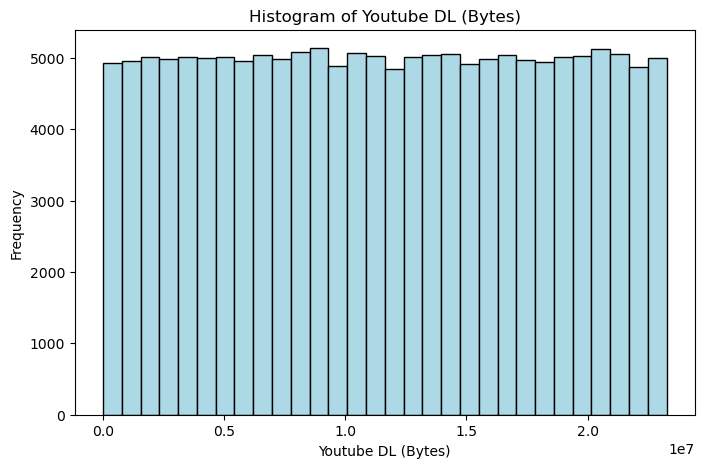

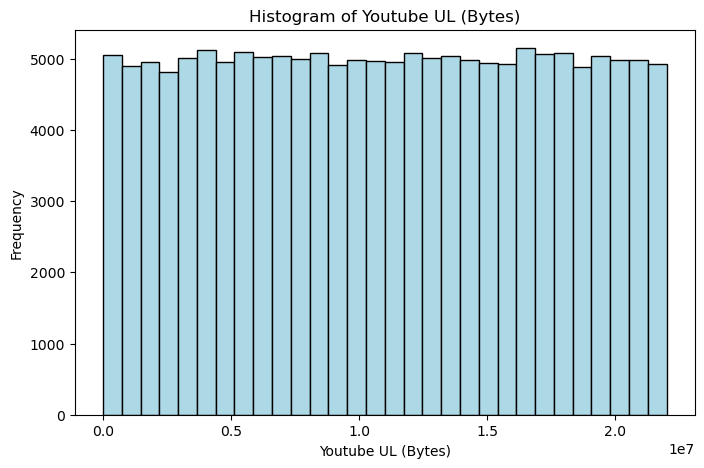

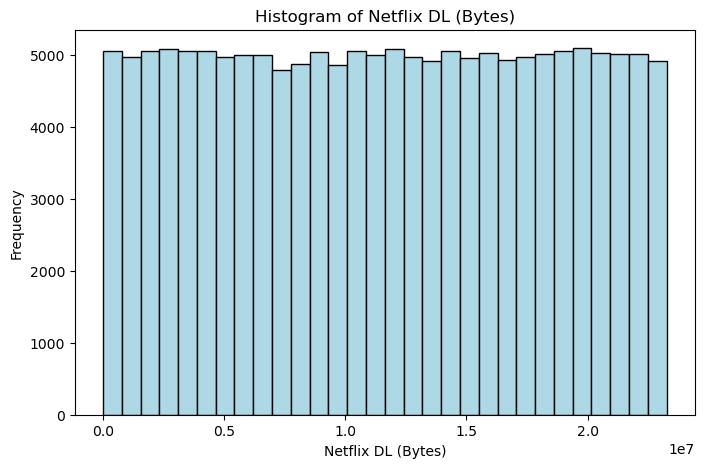

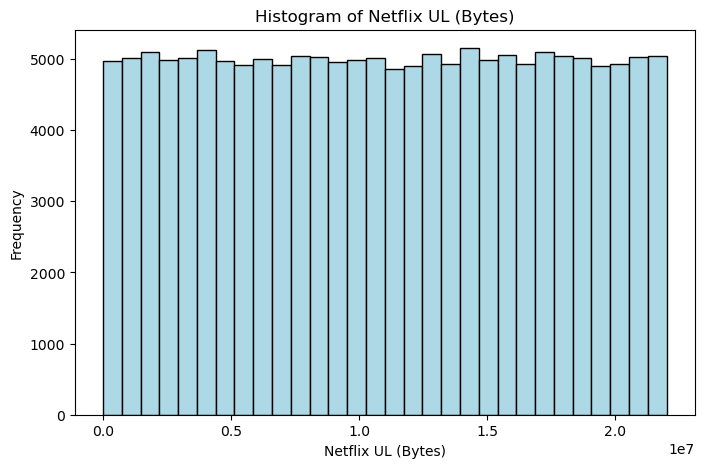

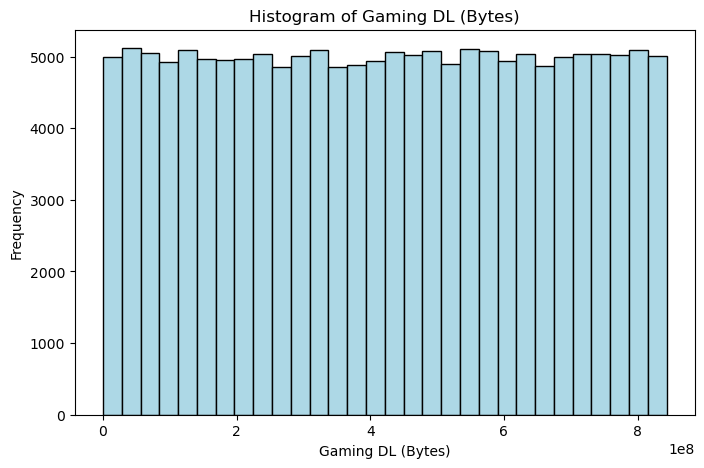

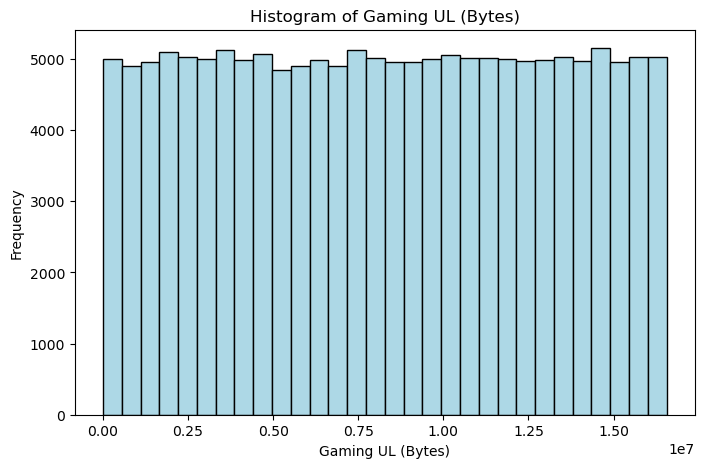

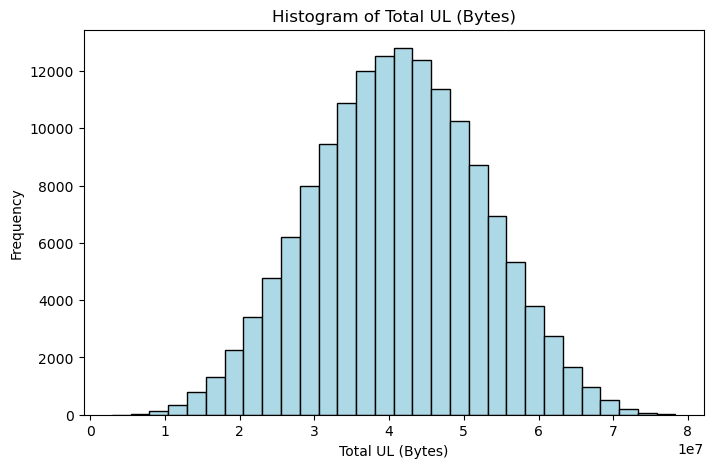

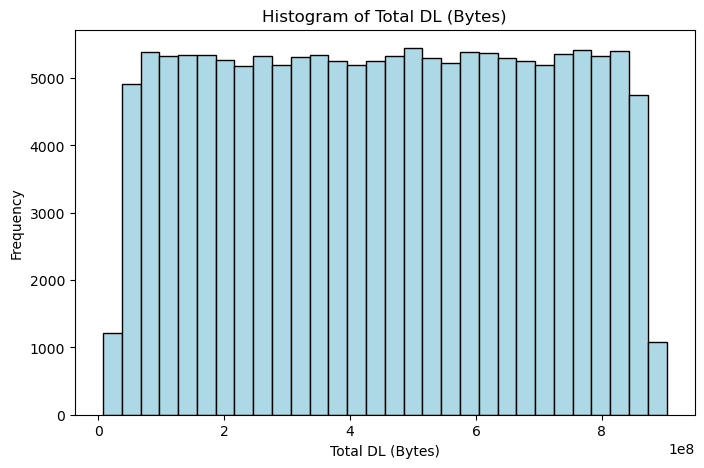

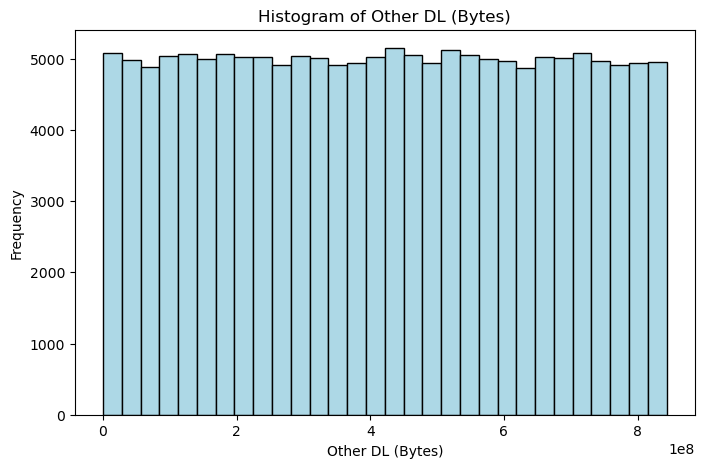

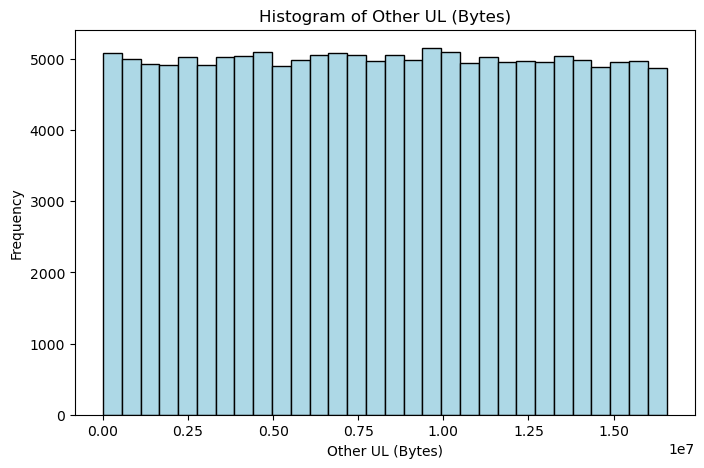

In [20]:
numeric_columns = data_new

for column in numeric_columns:
    plot_histogram(df, column)


Bivariate Analysis between each application & the total DL+UL data

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

applications = [
    'Social Media',
    'Google',
    'Email',
    'Youtube',
    'Netflix',
    'Gaming',
    'Other',
]



scatter plot

c:\Users\hp\.conda\envs\your_env_name\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


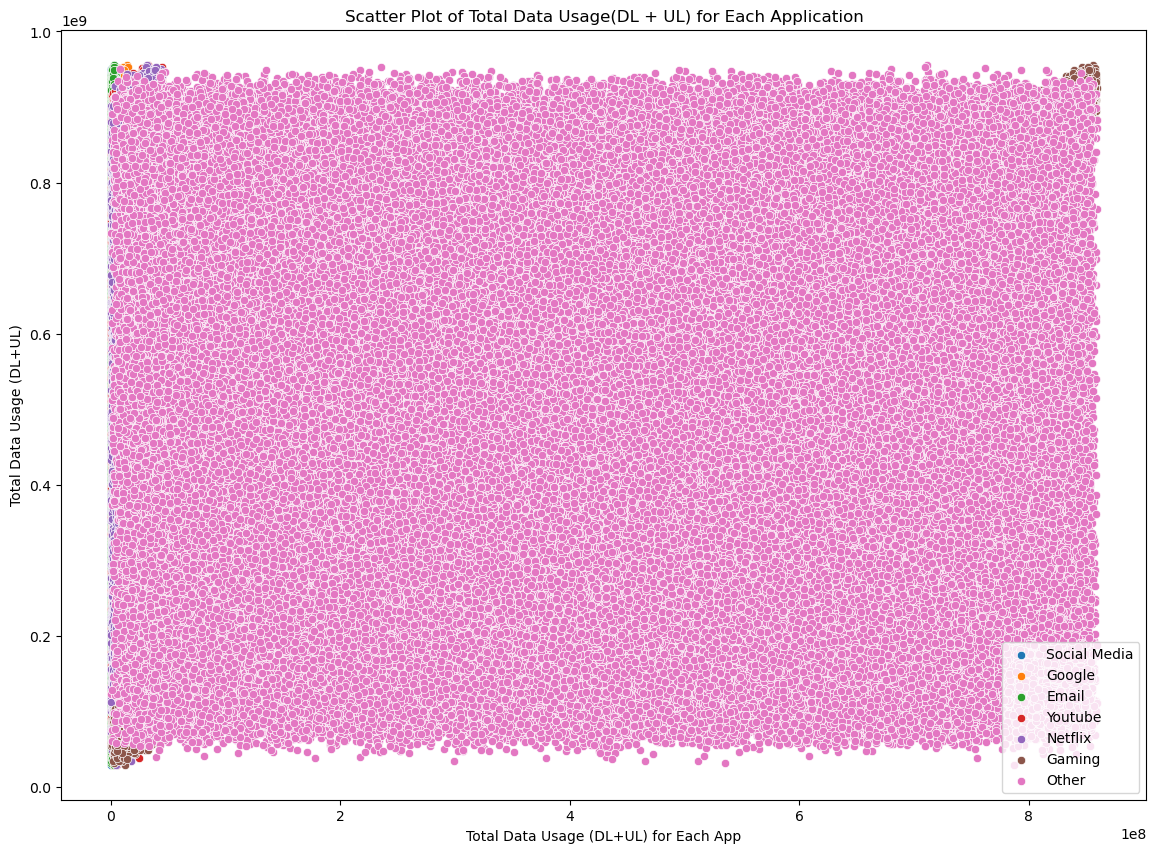

In [22]:


# Scatter Plot of Total Data Usage(DL + UL) for Each Application
plt.figure(figsize=(14, 10))
for app in applications:
    sns.scatterplot(x=df[app + ' DL (Bytes)'] + df[app + ' UL (Bytes)'], y=df['Total UL (Bytes)'] + df['Total DL (Bytes)'], label=app)
plt.title('Scatter Plot of Total Data Usage(DL + UL) for Each Application')
plt.xlabel('Total Data Usage (DL+UL) for Each App')
plt.ylabel('Total Data Usage (DL+UL)')
plt.legend()
plt.show()



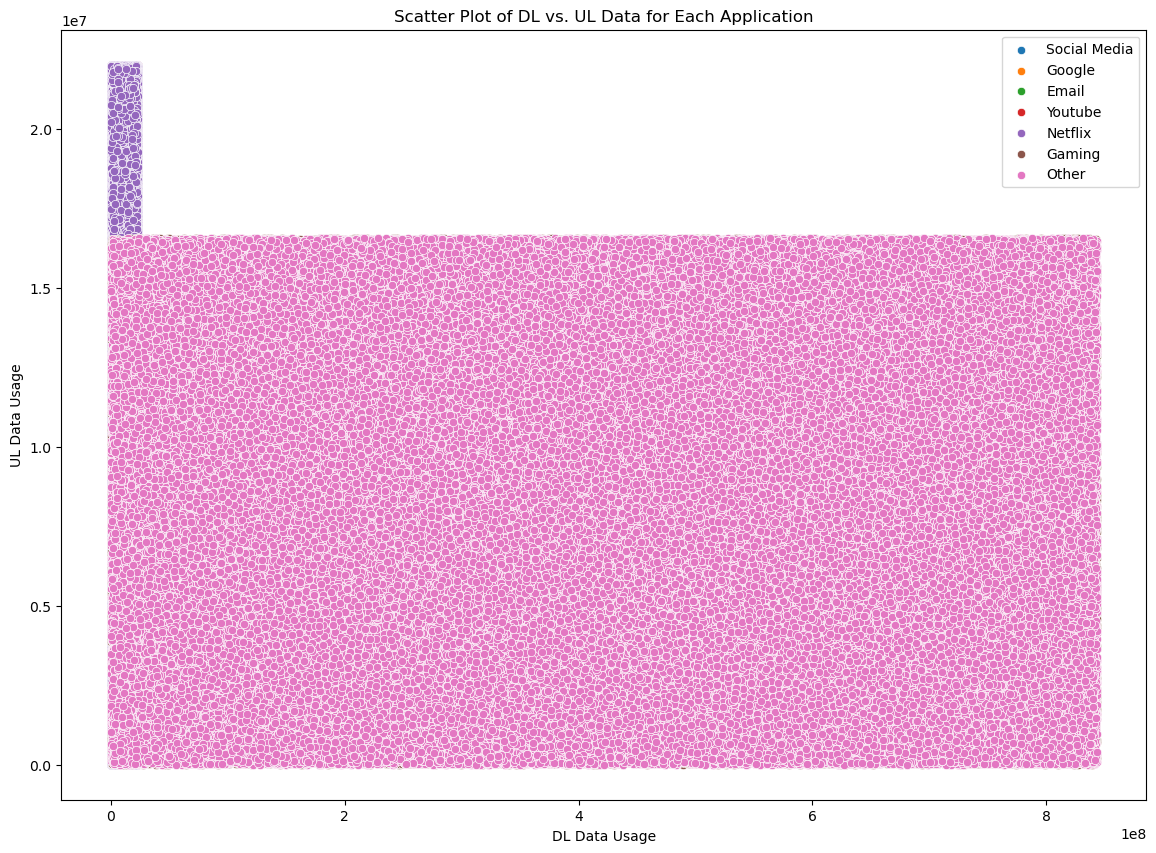

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
for app in applications:
    sns.scatterplot(x=df[app + ' DL (Bytes)'], y=df[app + ' UL (Bytes)'], label=app)
plt.title('Scatter Plot of DL vs. UL Data for Each Application')
plt.xlabel('DL Data Usage')
plt.ylabel('UL Data Usage')
plt.legend()
plt.show()


In [37]:


# for app in applications:        
#     scatter_plot_UL_vs_DL(df, app)

In [38]:

import pandas as pd
df['end_time']=pd.to_datetime(df['End'])
df['start_time']=pd.to_datetime(df['Start'])

# Calculate call duration for each call
df['call_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()
# Calculate total DL+UL data
df['Total Data (DL+UL)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Calculate total call duration for each user and Segment the users into deciles based on the total call duration
df['user_total_duration_deciles'] = pd.qcut(df.groupby('MSISDN/Number')['call_duration'].transform('sum'), q=10, labels=False, duplicates='drop')

# Aggregate the total data (DL+UL) per decile class
total_data_per_decile = df.groupby('user_total_duration_deciles')['Total Data (DL+UL)'].sum().reset_index()

## sorted_total_data_per_decile
sorted_total_data_per_decile=total_data_per_decile.sort_values(by='Total Data (DL+UL)', ascending=False)

print(sorted_total_data_per_decile)


   user_total_duration_deciles  Total Data (DL+UL)
2                          2.0        9.470594e+12
5                          5.0        9.182179e+12
0                          0.0        7.387807e+12
4                          4.0        7.387649e+12
7                          7.0        7.385689e+12
1                          1.0        7.378985e+12
8                          8.0        7.363295e+12
9                          9.0        7.355558e+12
6                          6.0        5.591480e+12
3                          3.0        5.330211e+12


Correlation Analysis

In [39]:
# Select the relevant columns
selected_data= [
    'Social Media DL (Bytes)',
    'Google DL (Bytes)',
    'Email DL (Bytes)',
    'Youtube DL (Bytes)',
    'Netflix DL (Bytes)',
    'Gaming DL (Bytes)',
    'Other DL (Bytes)',
    'Social Media UL (Bytes)',
    'Google UL (Bytes)',
    'Email UL (Bytes)',
    'Youtube UL (Bytes)',
    'Netflix UL (Bytes)',
    'Gaming UL (Bytes)',
    'Other UL (Bytes)'
]
corr_data=cleaned_data[selected_data]

# Compute the correlation matrix
correlation_matrix = corr_data.corr().round(2)
correlation_matrix


,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes),Other UL (Bytes)
Social Media DL (Bytes),1.00,-0.0,0.0,-0.0,-0.00,0.0,0.01,-0.0,0.0,-0.00,0.00,0.00,0.00,0.00
Google DL (Bytes),-0.00,1.0,-0.0,0.0,0.00,-0.0,-0.00,0.0,-0.0,0.00,0.00,-0.00,-0.00,-0.00
Email DL (Bytes),0.00,-0.0,1.0,0.0,0.00,0.0,-0.00,0.0,-0.0,0.00,-0.00,-0.00,-0.00,0.00
Youtube DL (Bytes),-0.00,0.0,0.0,1.0,0.00,-0.0,0.00,-0.0,0.0,-0.00,0.00,0.00,-0.00,-0.00
Netflix DL (Bytes),-0.00,0.0,0.0,0.0,1.00,-0.0,-0.01,-0.0,-0.0,-0.00,0.00,0.00,-0.00,-0.00
Gaming DL (Bytes),0.00,-0.0,0.0,-0.0,-0.00,1.0,-0.00,0.0,0.0,-0.00,-0.00,-0.00,0.00,-0.00
Other DL (Bytes),0.01,-0.0,-0.0,0.0,-0.01,-0.0,1.00,-0.0,0.0,-0.00,0.00,-0.01,-0.00,0.00
Social Media UL (Bytes),-0.00,0.0,0.0,-0.0,-0.00,0.0,-0.00,1.0,0.0,-0.00,-0.00,-0.00,0.00,0.00
Google UL (Bytes),0.00,-0.0,-0.0,0.0,-0.00,0.0,0.00,0.0,1.0,-0.00,0.00,-0.00,-0.00,-0.00
Email UL (Bytes),-0.00,0.0,0.0,-0.0,-0.00,-0.0,-0.00,-0.0,-0.0,1.00,-0.01,0.00,0.01,0.00


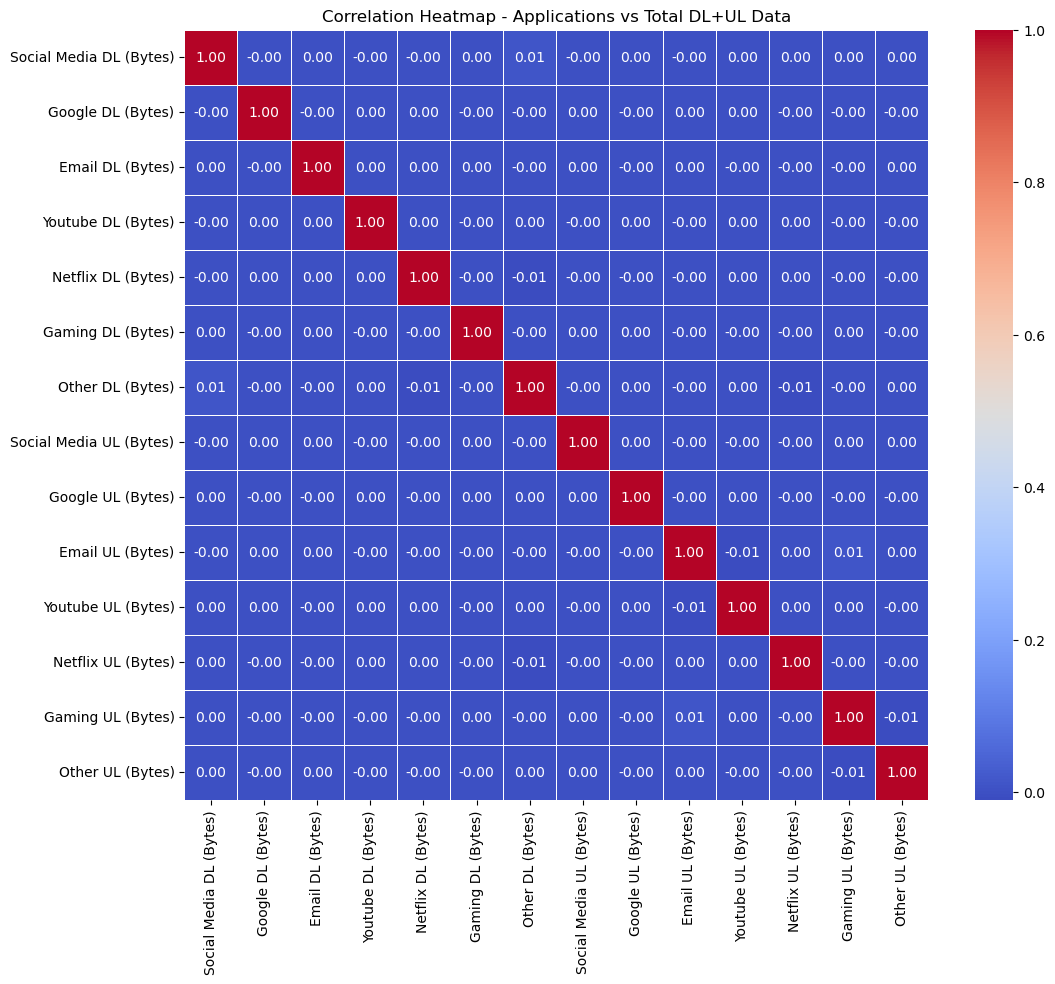

In [40]:

# Plot a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Applications vs Total DL+UL Data')
plt.show()